## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [34]:
df = pd.read_csv("train.csv")

In [35]:
df.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [36]:
df.shape

(6019, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Manufacturer       6019 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 611.4+ KB


In [38]:
df[["Location","Fuel_Type","Transmission","Owner_Type","Manufacturer"]] = df[["Location","Fuel_Type","Transmission","Owner_Type","Manufacturer"]].astype("category")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         6019 non-null   int64   
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   float64 
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Manufacturer       6019 non-null   category
dtypes: category(5), float64(5), int64(3)
memory usage: 408.1 KB


In [40]:
df.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [41]:
df.Manufacturer.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Lamborghini         1
Isuzu               1
Smart               1
Ambassador          1
Name: Manufacturer, dtype: int64

In [42]:
train = df.drop("Unnamed: 0", axis = 1).copy()

In [43]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [44]:
test = pd.read_csv("test.csv")

In [45]:
test[["Location","Fuel_Type","Transmission","Owner_Type","Manufacturer"]] = test[["Location","Fuel_Type","Transmission","Owner_Type","Manufacturer"]].astype("category")

In [46]:
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [47]:
train.shape, test.shape

((6019, 12), (1234, 11))

In [48]:
X = train.drop("Price", axis = 1).copy()
y = train.Price

In [49]:
X.shape, y.shape

((6019, 11), (6019,))

In [50]:
corr = train.corr()

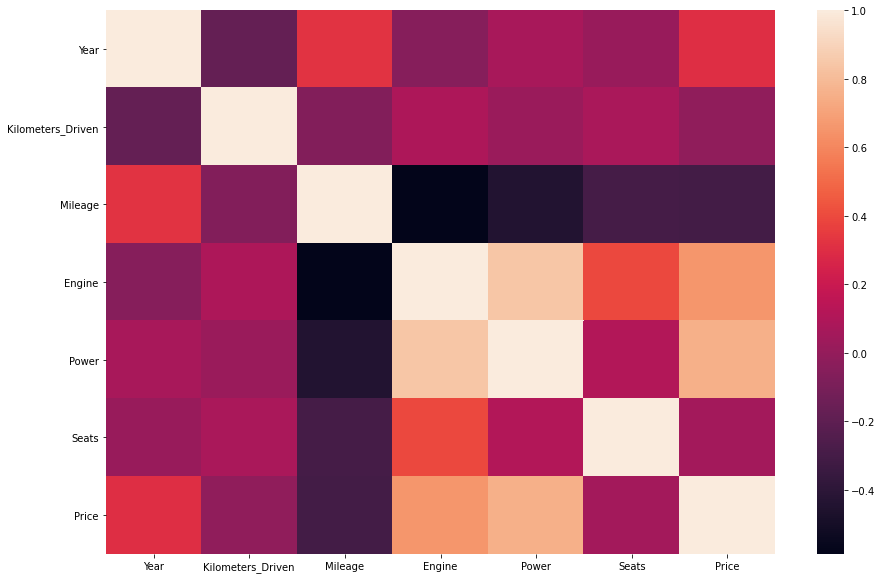

In [51]:
plt.figure(figsize = (15,10))
sns.heatmap(corr)
plt.show()

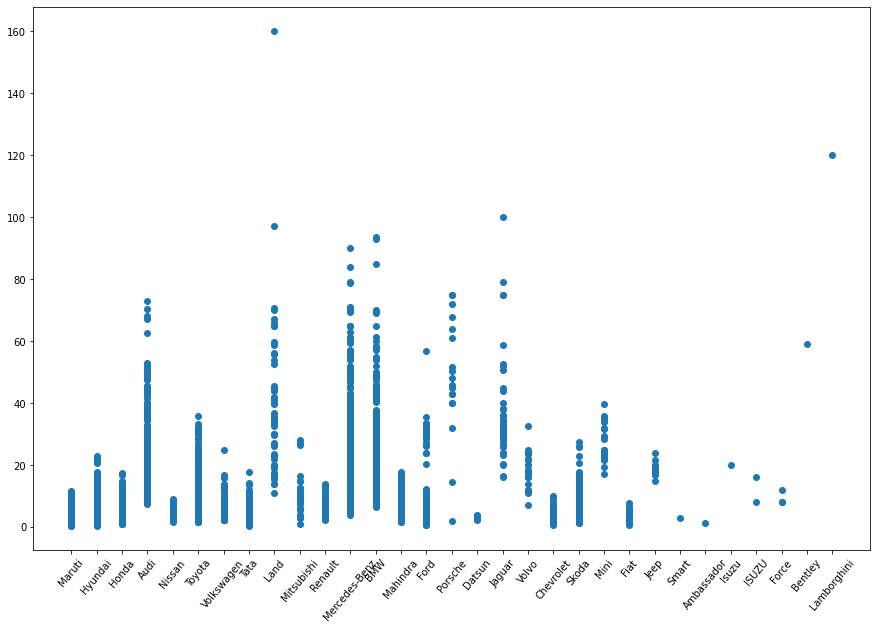

In [52]:
plt.figure(figsize = (15,10))
plt.scatter(train.Manufacturer, train.Price)
plt.xticks(rotation = 50)
plt.show()

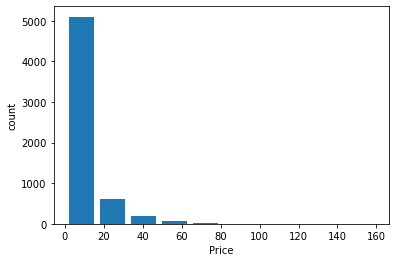

In [53]:
plt.hist(train.Price, rwidth = 0.8)
plt.xlabel("Price")
plt.ylabel("count")
plt.show()

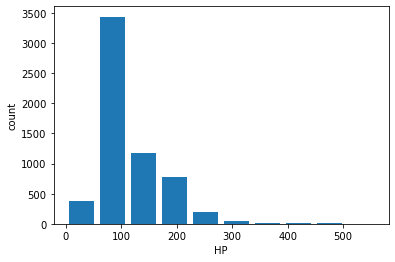

In [54]:
plt.hist(train.Power, rwidth = 0.8)
plt.xlabel("HP")
plt.ylabel("count")
plt.show()

In [55]:
from catboost import Pool, CatBoostRegressor

In [56]:
train.select_dtypes(include = ["category"]).head(1)

,Location,Fuel_Type,Transmission,Owner_Type,Manufacturer
0,Mumbai,CNG,Manual,First,Maruti


In [57]:
train_pool = Pool(X, y, cat_features = ["Location","Fuel_Type","Transmission","Owner_Type","Manufacturer"])
test_pool = Pool(test, cat_features = ["Location","Fuel_Type","Transmission","Owner_Type","Manufacturer"])

In [58]:
catboost = CatBoostRegressor(iterations = 100, depth = 15, learning_rate = 0.01, loss_function = "RMSE")

In [68]:
fit_catboost = catboost.fit(train_pool)

0:	learn: 11.1036833	total: 52.9ms	remaining: 5.24s
1:	learn: 11.0198885	total: 161ms	remaining: 7.89s
2:	learn: 10.9389870	total: 372ms	remaining: 12s
3:	learn: 10.8599463	total: 1.19s	remaining: 28.6s
4:	learn: 10.7815969	total: 1.97s	remaining: 37.4s
5:	learn: 10.7045791	total: 2.76s	remaining: 43.3s
6:	learn: 10.6285521	total: 3.16s	remaining: 42s
7:	learn: 10.5522782	total: 3.37s	remaining: 38.8s
8:	learn: 10.4783582	total: 3.42s	remaining: 34.6s
9:	learn: 10.4020050	total: 3.82s	remaining: 34.4s
10:	learn: 10.3303249	total: 3.83s	remaining: 31s
11:	learn: 10.2585589	total: 4.57s	remaining: 33.5s
12:	learn: 10.1839429	total: 4.61s	remaining: 30.9s
13:	learn: 10.1120107	total: 4.63s	remaining: 28.4s
14:	learn: 10.0446968	total: 5.4s	remaining: 30.6s
15:	learn: 9.9779084	total: 5.6s	remaining: 29.4s
16:	learn: 9.9089216	total: 5.62s	remaining: 27.4s
17:	learn: 9.8420407	total: 5.63s	remaining: 25.6s
18:	learn: 9.7721202	total: 5.65s	remaining: 24.1s
19:	learn: 9.7069516	total: 6.46s

In [60]:
preds = catboost.predict(test_pool)
preds

array([ 5.87430995,  5.70998485, 13.46469984, ...,  5.77069885,
        7.42168398, 16.24552846])

In [61]:
X.Year.min()

1998

In [62]:
X.Year.dtype

dtype('int64')

In [63]:
X.Fuel_Type.values.unique()

['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']
Categories (5, object): ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']

In [69]:
model_path = "D:\DataScience\Kaggle\Regression\streamlit_app\catboost.pickle"
pickle.dump(fit_catboost, open(model_path, 'wb'))